In [1]:
#Importing necessary libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pandas import DataFrame , concat
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Activation,Dropout
from tensorflow.keras.optimizers import Adam
from numpy import array , hstack
from tensorflow import keras
import tensorflow as tf
import datetime as dt
from datetime import datetime
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam
import sklearn.metrics as metrics

%matplotlib inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
methanol_price_trends = pd.read_excel("updated_master.xlsx")
methanol_price_trends.tail()

,India Date,India Price,Asia Date,Asia Price,China Date,China Price,Rotterdam Date,Rotterdam Price,US Domestic Date,US Domestic Price,USG Date,USG Price
2995,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,2021-07-02,112.0
2996,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,2021-07-06,113.0
2997,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,2021-07-07,113.0
2998,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,2021-07-08,113.0
2999,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,2021-07-09,113.0


In [3]:
methanol_price_trends.columns

Index(['India Date', 'India Price', 'Asia Date', 'Asia Price', 'China Date',
       'China Price', 'Rotterdam Date', 'Rotterdam Price', 'US Domestic Date',
       'US Domestic Price', 'USG Date', 'USG Price'],
      dtype='object')

In [4]:
#Converting the date into datetime format
methanol_price_trends['India Date'] = pd.to_datetime(methanol_price_trends['India Date'],format='%m-%d-%Y')
methanol_price_trends['Asia Date'] = pd.to_datetime(methanol_price_trends['Asia Date'],format='%m-%d-%Y')
methanol_price_trends['China Date'] = pd.to_datetime(methanol_price_trends['China Date'],format='%m-%d-%Y')
methanol_price_trends['Rotterdam Date'] = pd.to_datetime(methanol_price_trends['Rotterdam Date'],format='%m-%d-%Y')
methanol_price_trends['US Domestic Date'] = pd.to_datetime(methanol_price_trends['US Domestic Date'],format='%m-%d-%Y')
methanol_price_trends['USG Date'] = pd.to_datetime(methanol_price_trends['USG Date'],format='%m-%d-%Y')


In [5]:
#Creating separate data frames to store the prices of different regions
methanol_price_trends_india = methanol_price_trends[['India Date','India Price']]

In [6]:
#Creating separate data frames to store the prices of different regions
methanol_price_trends_china = methanol_price_trends[['China Date','China Price']]

In [7]:
#Creating separate data frames to store the prices of different regions
methanol_price_trends_china = methanol_price_trends[['China Date','China Price']]

In [8]:
#Creating separate data frames to store the prices of different regions
methanol_price_trends_asia = methanol_price_trends[['Asia Date','Asia Price']]

In [9]:
#Creating separate data frames to store the prices of different regions
methanol_price_trends_rotterdam = methanol_price_trends[['Rotterdam Date','Rotterdam Price']]

In [10]:
#Creating separate data frames to store the prices of different regions
methanol_price_trends_USD = methanol_price_trends[['US Domestic Date','US Domestic Price']]

In [11]:
#Creating separate data frames to store the prices of different regions
#methanol_price_trends_USG = methanol_price_trends[['USG Date','USG Price']]

In [12]:
#Different attributes were collected on different days of the week. Defining a function for bringing them to the same day of the week.
def date_alignment(df,col):
    
    df['Day']=df[col].dt.day_name()
    df.loc[df['Day']=='Thursday', col]=df.loc[df['Day']=='Thursday'][col]=df.loc[df['Day']=='Thursday',col]+pd.Timedelta(1, unit='D')
    df.loc[df['Day']=='Wednesday', col]=df.loc[df['Day']=='Wednesday'][col]=df.loc[df['Day']=='Wednesday',col]+pd.Timedelta(2, unit='D')
    df.loc[df['Day']=='Tuesday', col]=df.loc[df['Day']=='Tuesday'][col]=df.loc[df['Day']=='Tuesday', col]+pd.Timedelta(3, unit='D')
    df.loc[df['Day']=='Monday', col]=df.loc[df['Day']=='Monday'][col]=df.loc[df['Day']=='Monday',col ]+pd.Timedelta(4, unit='D')
    df.drop('Day',axis=1,inplace=True)
    df.dropna(inplace=True)
    df.sort_values(by= col,ascending= True , inplace=True)
    df.set_index(col,inplace=True)
    
    return df 


In [13]:
#Bringing all the attributes to the same day of the week.
methanol_price_trends_india=date_alignment(methanol_price_trends_india,'India Date')
methanol_price_trends_asia=date_alignment(methanol_price_trends_asia,'Asia Date')
methanol_price_trends_rotterdam=date_alignment(methanol_price_trends_rotterdam,'Rotterdam Date')
methanol_price_trends_USD=date_alignment(methanol_price_trends_USD,'US Domestic Date')
methanol_price_trends_china=date_alignment(methanol_price_trends_china,'China Date')
#methanol_price_trends_USG=date_alignment(methanol_price_trends_USG,'USG Date')
#natural_gas_price=date_alignment(natural_gas_price,'Date')
#crude_oil_price=date_alignment(crude_oil_price,'Date')

In [15]:
methanol_price_trends_china.to_csv("china_price.csv")

In [34]:
#Merging the prices of different regions into one data frame based on the date.
methanol_price_trends_df = pd.merge(methanol_price_trends_india, methanol_price_trends_asia, how='inner',left_index=True, right_index=True, sort=True)

In [35]:
#Merging the prices of different regions into one data frame based on the date.
methanol_price_trends_df = pd.merge(methanol_price_trends_df,methanol_price_trends_china, how='inner',left_index=True, right_index=True,
         sort=True
         )

In [36]:
#Merging the prices of different regions into one data frame based on the date.
methanol_price_trends_df = pd.merge(methanol_price_trends_df,methanol_price_trends_rotterdam, how='inner',left_index=True, right_index=True,
         sort=True
         )

In [37]:
#Merging the prices of different regions into one data frame based on the date.
methanol_price_trends_df = pd.merge(methanol_price_trends_df,methanol_price_trends_USD, how='inner',left_index=True, right_index=True,
         sort=True
         )

In [38]:
#Merging the prices of different regions into one data frame based on the date.
#methanol_price_trends_df = pd.merge(methanol_price_trends_df,methanol_price_trends_USG, how='inner',left_index=True, right_index=True,
 #        sort=True
  #     )

In [39]:
methanol_price_trends_df

,India Price,Asia Price,China Price,Rotterdam Price,US Domestic Price
2008-04-11,322.5,340.0,368.000,221.8,141.96
2008-04-18,317.5,337.5,381.500,220.4,141.96
2008-04-25,327.5,342.5,399.000,224.8,141.96
2008-05-02,330.0,342.5,403.125,215.0,137.41
2008-05-09,345.0,345.0,413.000,218.5,137.41
...,...,...,...,...,...
2021-06-11,294.0,353.0,309.800,305.0,121.13
2021-06-18,294.0,355.0,308.600,310.8,121.13
2021-06-25,292.0,364.0,307.000,309.5,121.13
2021-07-02,292.0,368.0,308.000,313.2,121.13


In [44]:
cor=methanol_price_trends_df.corr()
cor

,India Price,Asia Price,China Price,Rotterdam Price,US Domestic Price
India Price,1.000000,0.942889,0.965259,0.797367,0.820551
Asia Price,0.942889,1.000000,0.934452,0.879156,0.872139
China Price,0.965259,0.934452,1.000000,0.775553,0.831052
Rotterdam Price,0.797367,0.879156,0.775553,1.000000,0.817333
US Domestic Price,0.820551,0.872139,0.831052,0.817333,1.000000


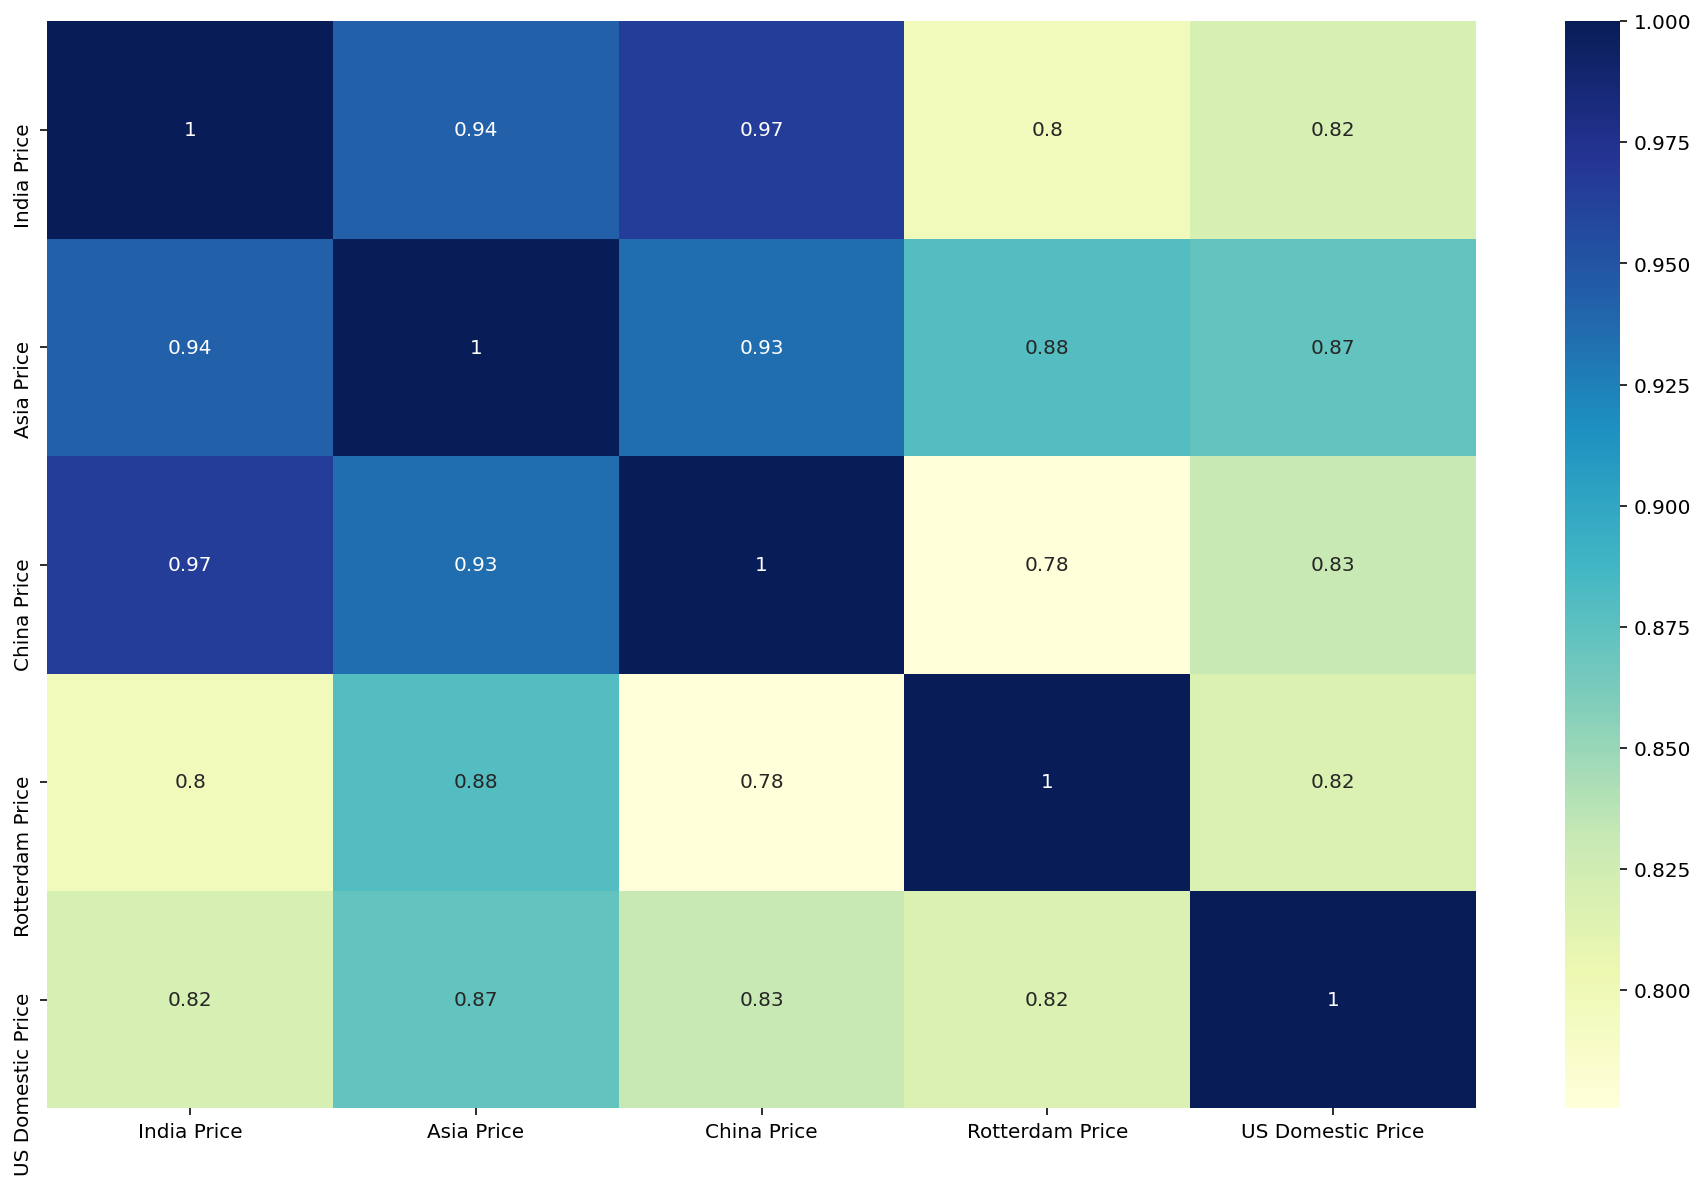

In [45]:
plt.figure(figsize = (16, 10))
sns.heatmap(cor, annot = True, cmap="YlGnBu")
plt.show()

In [46]:
#methanol_price_trends_df.to_csv("methanol_master.csv")

In [28]:
df = pd.read_csv("master methanol.csv")
df.tail()

,Date,India Price,Asia Price,China Price,Rotterdam Price,US Domestic Price,Natural Gas Price,Crude Oil Price
687,11-06-2021,294.0,353.0,309.8,305.0,121.13,3.12,71.5
688,18-06-2021,294.0,355.0,308.6,310.8,121.13,3.28,71.5
689,25-06-2021,292.0,364.0,307.0,309.5,121.13,3.28,71.5
690,02-07-2021,292.0,368.0,308.0,313.2,121.13,3.11,74.8
691,09-07-2021,290.0,381.0,306.4,334.7,121.13,3.11,74.8


In [29]:
#Creating the training dataset
dataset_train= df.iloc[:550,:]
dataset_test =df.iloc[550:,:]

In [30]:
# Select features (columns) to be involved into training and predictions
cols = list(dataset_train)[1:9]

# Extract dates (will be used in visualization)
datelist_train = list(dataset_train['Date'])

#Displaying the values
print('Training set shape == {}'.format(dataset_train.shape))
print('All timestamps == {}'.format(len(datelist_train)))
print('Featured selected: {}'.format(cols))

Training set shape == (550, 8)
All timestamps == 550
Featured selected: ['India Price', 'Asia Price', 'China Price', 'Rotterdam Price', 'US Domestic Price', 'Natural Gas Price', 'Crude Oil Price']


In [31]:
#Preparing the training set
dataset_train = dataset_train[cols].astype(str)
for i in cols:
    for j in range(0, len(dataset_train)):
        dataset_train[i][j] = dataset_train[i][j].replace(',', '')

dataset_train = dataset_train.astype(float)
training_set = dataset_train.to_numpy()

print('Shape of training set == {}.'.format(training_set.shape))
print (training_set)

Shape of training set == (550, 7).
[[322.5  340.   368.   ... 141.96   9.88 106.6 ]
 [317.5  337.5  381.5  ... 141.96  10.13 110.42]
 [327.5  342.5  399.   ... 141.96  10.54 114.34]
 ...
 [375.   438.   411.   ... 124.53   3.23  85.44]
 [445.5  446.   419.2  ... 124.53   3.3   83.05]
 [455.5  455.   423.8  ... 126.23   3.26  80.41]]


In [32]:
# Feature scaling using standard scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

sc_predict = StandardScaler()
sc_predict.fit_transform(training_set[:, 0:5])

array([[ 0.25672646, -0.0040704 ,  0.53171248, -0.39874892,  1.21619181],
       [ 0.19394879, -0.03240866,  0.70931281, -0.40856459,  1.21619181],
       [ 0.31950414,  0.02426785,  0.93953547, -0.37771532,  1.21619181],
       ...,
       [ 0.91589209,  1.10678924,  1.09740243,  0.60174928,  0.549549  ],
       [ 1.80105736,  1.19747166,  1.20527819,  0.69499823,  0.549549  ],
       [ 1.92661272,  1.29948938,  1.26579386,  0.67116016,  0.61456867]])

In [33]:
# Creating a data structures for training

X_train = []
y_train = []

#n_future = 20   # Number of weeks we want top predict into the future
n_past = 20    # Number of weeks we want to use to predict the future

for i in range(n_past, len(training_set_scaled)):
    X_train.append(training_set_scaled[i - n_past:i, 0:dataset_train.shape[1] ])  #dataset_train.shape[1]
    y_train.append(training_set_scaled[i, :5])

X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (530, 20, 7).
y_train shape == (530, 5).


In [34]:
# Initializing the Neural Network based on LSTM
model = Sequential()

# Adding 1st LSTM layer
model.add(LSTM(units=35, return_sequences=False,input_shape=(n_past, 7)))  #

# Adding 2nd LSTM layer
#model.add(LSTM(units=12, return_sequences=False))

#model.add(LSTM(units=5, return_sequences=False))
# Adding Dropout
model.add(Dropout(0.25))
# Adding 3rd LSTM Layer
#model.add(LSTM(units=5, return_sequences=False))
# Output layer
model.add(Dense(units=5, activation='linear'))

# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mse','mae','mape'])

In [35]:
%%time
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=7, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, verbose=1)
mcp = ModelCheckpoint(filepath='weights_80%train.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

history = model.fit(X_train, y_train, shuffle=False, epochs=30, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=70)

Epoch 1/30
7/7 [==============================] - 5s 360ms/step - loss: 0.9500 - mse: 0.9500 - mae: 0.6516 - mape: 197.4959 - val_loss: 0.2426 - val_mse: 0.2426 - val_mae: 0.4043 - val_mape: 143.1608

Epoch 00001: val_loss improved from inf to 0.24264, saving model to weights_80%train.h5
Epoch 2/30
7/7 [==============================] - 0s 32ms/step - loss: 0.4388 - mse: 0.4388 - mae: 0.4387 - mape: 195.5762 - val_loss: 0.1054 - val_mse: 0.1054 - val_mae: 0.2435 - val_mape: 76.9996

Epoch 00002: val_loss improved from 0.24264 to 0.10538, saving model to weights_80%train.h5
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3348 - mse: 0.3348 - mae: 0.3315 - mape: 110.2194 - val_loss: 0.0986 - val_mse: 0.0986 - val_mae: 0.2330 - val_mape: 84.0719

Epoch 00003: val_loss improved from 0.10538 to 0.09857, saving model to weights_80%train.h5
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.2690 - mse: 0.2690 - mae: 0.2825 - mape: 116.4514 - val_

In [36]:
# Perform predictions
#predictions_future = model.predict(X_train[-n_future:])

predictions_train = model.predict(X_train[:])

#predictions_test_set = model.predict(X_test)

In [37]:
y_pred_train = sc_predict.inverse_transform(predictions_train)
#prediction_train = pd.DataFrame(y_pred_train, columns=['India Price']).set_index(pd.Series(datelist_train[n_past:]))

In [38]:
x= datelist_train[n_past:]
pred_df = pd.DataFrame(y_pred_train,
                 index=x,
                 columns=['India Predicted', 'Asia Predicted','China Predicted',
                          "Rotterdam Predicted",'US Domestic Predicted'])

In [39]:
l = sc_predict.inverse_transform(y_train)
pred_train_df = pd.DataFrame(l,                                     # ACtual Price
                 index=x,
                 columns=['India Actual', 'Asia Actual','China Actual',"Rotterdam Actual",'US Domestic Actual'])

<AxesSubplot:>

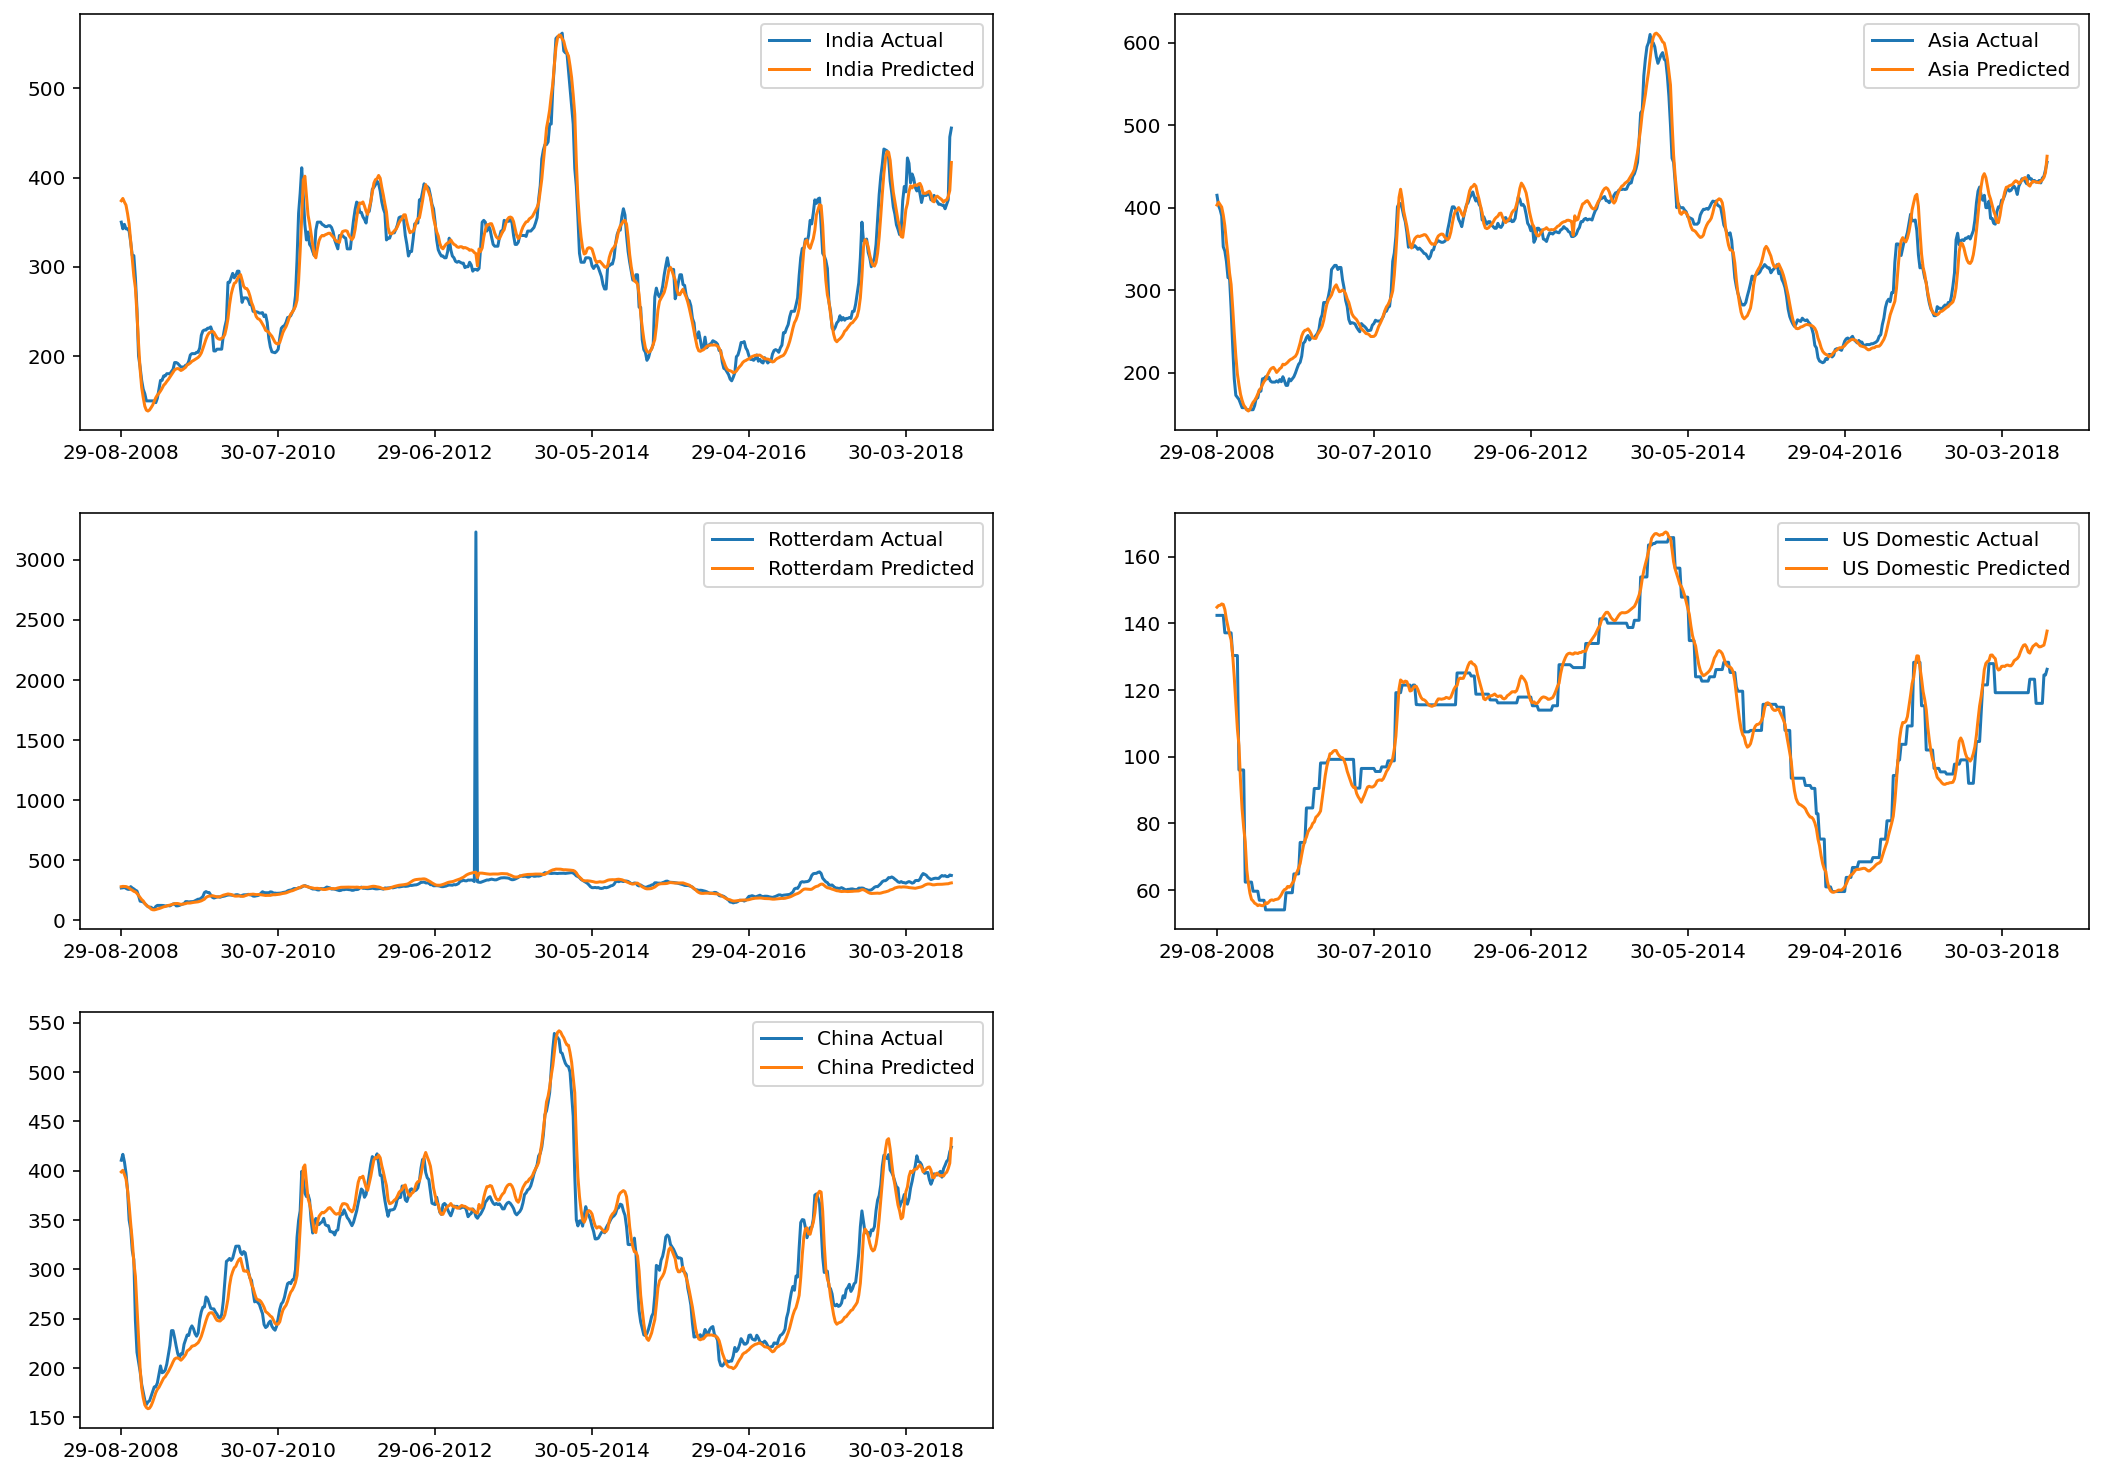

In [40]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18,13)
plt.subplot(3,2,1)
pred_train_df['India Actual'].plot(legend=True)
pred_df['India Predicted'].plot(legend=True)

plt.subplot(3,2,2)
pred_train_df['Asia Actual'].plot(legend=True)
pred_df['Asia Predicted'].plot(legend=True)

plt.subplot(3,2,3)
pred_train_df['Rotterdam Actual'].plot(legend=True)
pred_df['Rotterdam Predicted'].plot(legend=True)

plt.subplot(3,2,4)
pred_train_df['US Domestic Actual'].plot(legend=True)
pred_df['US Domestic Predicted'].plot(legend=True)

plt.subplot(3,2,5)
pred_train_df['China Actual'].plot(legend=True)
pred_df['China Predicted'].plot(legend=True)


#Saving the plot as an image
#plt.savefig('train_plot.jpg', bbox_inches='tight', dpi=150)

In [41]:
# Defining mean absolute percentage error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [42]:
# Checking the mean absolute error
# Checking the mean absolute error
mae = metrics.mean_absolute_error(np.array(pred_train_df['India Actual']),np.array(pred_df['India Predicted']))
mse = metrics.mean_squared_error(np.array(pred_train_df['India Actual']),np.array(pred_df['India Predicted']))
mape = mean_absolute_percentage_error(np.array(pred_train_df['India Actual']),np.array(pred_df['India Predicted']))
print("Mean absolute error of train data set (India):       {}".format(mae))
print("Mean absolute % error of train dataset (India):      {}".format(mape))
print("Mean squared error of error of train dataset (India) :{}".format(mse))
print("*"*50)


mae = metrics.mean_absolute_error(np.array(pred_train_df['Asia Actual']),np.array(pred_df['Asia Predicted']))
mse = metrics.mean_squared_error(np.array(pred_train_df['Asia Actual']),np.array(pred_df['Asia Predicted']))
mape = mean_absolute_percentage_error(np.array(pred_train_df['Asia Actual']),np.array(pred_df['Asia Predicted']))
print("Mean absolute error of train data set (Asia):       {}".format(mae))
print("Mean absolute % error of train dataset (Asia):      {}".format(mape))
print("Mean squared error of error of train dataset (Asia) :{}".format(mse))
print("*"*50)

mae = metrics.mean_absolute_error(np.array(pred_train_df['Rotterdam Actual']),np.array(pred_df['Rotterdam Predicted']))
mse = metrics.mean_squared_error(np.array(pred_train_df['Rotterdam Actual']),np.array(pred_df['Rotterdam Predicted']))
mape = mean_absolute_percentage_error(np.array(pred_train_df['Rotterdam Actual']),np.array(pred_df['Rotterdam Predicted']))
print("Mean absolute error of train data set (Rotterdam):       {}".format(mae))
print("Mean absolute % error of train dataset (Rotterdam):      {}".format(mape))
print("Mean squared error of error of train dataset (Rotterdam) :{}".format(mse))
print("*"*50)


mae = metrics.mean_absolute_error(np.array(pred_train_df['US Domestic Actual']),np.array(pred_df['US Domestic Predicted']))
mse = metrics.mean_squared_error(np.array(pred_train_df['US Domestic Actual']),np.array(pred_df['US Domestic Predicted']))
mape = mean_absolute_percentage_error(np.array(pred_train_df['US Domestic Actual']),np.array(pred_df['US Domestic Predicted']))
print("Mean absolute error of train data set (US Domestic):       {}".format(mae))
print("Mean absolute % error of train dataset (US Domestic):      {}".format(mape))
print("Mean squared error of error of train dataset (US Domestic) :{}".format(mse))

Mean absolute error of train data set (India):       12.249564491128021
Mean absolute % error of train dataset (India):      4.146155241064496
Mean squared error of error of train dataset (India) :274.6996528525973
**************************************************
Mean absolute error of train data set (Asia):       12.129226396668631
Mean absolute % error of train dataset (Asia):      3.783566194796516
Mean squared error of error of train dataset (Asia) :259.29129063698446
**************************************************
Mean absolute error of train data set (Rotterdam):       30.0311541425597
Mean absolute % error of train dataset (Rotterdam):      8.767417235948386
Mean squared error of error of train dataset (Rotterdam) :16262.615099391935
**************************************************
Mean absolute error of train data set (US Domestic):       3.922289875246444
Mean absolute % error of train dataset (US Domestic):      3.781087730325704
Mean squared error of error of train da

In [43]:
#test data

In [44]:
# Select features (columns) to be involved into test and predictions
cols = list(dataset_test)[1:8]

# Extract dates (will be used in visualization)
datelist_test = list(dataset_test['Date'])

#Displaying the values
print('Test set shape == {}'.format(dataset_test.shape))
print('All timestamps == {}'.format(len(datelist_test)))
print('Featured selected: {}'.format(cols))

Test set shape == (142, 8)
All timestamps == 142
Featured selected: ['India Price', 'Asia Price', 'China Price', 'Rotterdam Price', 'US Domestic Price', 'Natural Gas Price', 'Crude Oil Price']


In [45]:
#Preparing the training set
dataset_test.reset_index(drop=True,inplace=True)
dataset_test = dataset_test[cols].astype(str)
for i in cols:
    for j in range(0, len(dataset_test)):
        dataset_test[i][j] = dataset_test[i][j].replace(',', '')

dataset_test = dataset_test.astype(float)
test_set = dataset_test.to_numpy()

print('Shape of test set == {}.'.format(test_set.shape))
print (test_set)

Shape of test set == (142, 7).
[[449.    453.    421.8   354.    126.23    3.32   78.23 ]
 [430.    448.    407.6   357.2   131.33    3.28   74.09 ]
 [390.    430.    378.75  352.8   131.33    3.58   70.34 ]
 [340.    425.    335.    338.7   131.33    4.23   66.21 ]
 [284.    371.    306.2   335.4   131.33    4.67   61.22 ]
 [267.    360.    277.8   308.3   131.33    4.43   58.65 ]
 [250.    330.    268.4   289.9   120.28    4.49   60.47 ]
 [238.    320.    271.6   293.2   120.28    4.38   59.51 ]
 [230.5   300.    267.6   287.3   120.28    3.73   54.64 ]
 [232.5   299.    263.    295.25  116.455   3.325  54.475]
 [232.5   299.    263.667 288.67  112.63    2.92   54.31 ]
 [233.    299.    267.6   277.2   112.63    2.89   58.64 ]
 [240.    300.    276.2   277.9   112.63    3.5    59.83 ]
 [285.5   304.    278.4   269.7   112.63    3.19   61.34 ]
 [290.5   320.5   282.6   271.2   110.08    2.9    61.38 ]
 [305.5   330.5   292.    280.4   110.08    2.59   61.71 ]
 [315.    332.    291.4  

In [46]:
# Feature scaling using standard scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
test_set_scaled = sc.fit_transform(test_set)

sc_predict = StandardScaler()
sc_predict.fit_transform(test_set[:, 0:5])

array([[ 3.60717601e+00,  2.46476631e+00,  3.20511699e+00,
         1.75188243e+00,  1.65487251e+00],
       [ 3.28541977e+00,  2.38740356e+00,  2.94041402e+00,
         1.80590312e+00,  1.91209526e+00],
       [ 2.60803822e+00,  2.10889766e+00,  2.40261961e+00,
         1.73162467e+00,  1.91209526e+00],
       [ 1.76131128e+00,  2.03153491e+00,  1.58707349e+00,
         1.49359600e+00,  1.91209526e+00],
       [ 8.12977116e-01,  1.19601722e+00,  1.05021113e+00,
         1.43788716e+00,  1.91209526e+00],
       [ 5.25089958e-01,  1.02581917e+00,  5.20805192e-01,
         9.80399443e-01,  1.91209526e+00],
       [ 2.37202799e-01,  5.61642668e-01,  3.45579283e-01,
         6.69780474e-01,  1.35477930e+00],
       [ 3.39883348e-02,  4.06917168e-01,  4.05230656e-01,
         7.25489311e-01,  1.35477930e+00],
       [-9.30207057e-02,  9.74661686e-02,  3.30666440e-01,
         6.25888663e-01,  1.35477930e+00],
       [-5.91516282e-02,  8.19936187e-02,  2.44917591e-01,
         7.60096316e-01

In [47]:
# Creating a data structures for test

X_test = []
y_test = []

  # Number of weeks we want top predict into the future
n_past = 20   # Number of weeks we want to use to predict the future
for i in range(n_past, len(test_set_scaled)):
    X_test.append(test_set_scaled[i - n_past:i, 0:dataset_test.shape[1] ])
    y_test.append(test_set_scaled[i , :5])

X_test, y_test = np.array(X_test), np.array(y_test)

print('X_test shape == {}.'.format(X_test.shape))
print('y_test shape == {}.'.format(y_test.shape))

X_test shape == (122, 20, 7).
y_test shape == (122, 5).


In [48]:
predictions_test_set = model.predict(X_test)

In [49]:
y_pred_test = sc_predict.inverse_transform(predictions_test_set)
y_pred_test.shape

(122, 5)

In [50]:
x = datelist_test[n_past:]

In [51]:
test_result = pd.DataFrame(y_pred_test,      #prediction on test data
                 index=x,
                 columns=['India Predicted', 'Asia Predicted','China Predicted',"Rotterdam Predicted",'US Domestic Predicted'])
test_result.head()

,India Predicted,Asia Predicted,China Predicted,Rotterdam Predicted,US Domestic Predicted
15-03-2019,285.686310,356.399719,294.785950,259.755676,114.738724
22-03-2019,286.069031,355.381195,295.946289,259.917877,114.050156
29-03-2019,286.626495,354.910553,296.835541,260.262146,113.447670
05-04-2019,284.387939,351.669983,294.724335,259.476196,112.294350
12-04-2019,285.380768,351.267639,295.879547,259.271423,111.443398


In [52]:
l = sc_predict.inverse_transform(y_test)
test_actual = pd.DataFrame(l,                                 #Actual test data
                 index=x,
                 columns=['India Actual', 'Asia Actual','China Actual',"Rotterdam Actual",'US Domestic Actual'])
test_actual.head()

,India Actual,Asia Actual,China Actual,Rotterdam Actual,US Domestic Actual
15-03-2019,292.0,320.0,304.6,288.2,103.6
22-03-2019,292.0,321.0,299.8,283.5,103.6
29-03-2019,290.0,320.0,294.2,276.4,103.6
05-04-2019,290.0,331.0,293.6,269.2,103.6
12-04-2019,291.0,335.0,299.0,267.7,103.6


<AxesSubplot:>

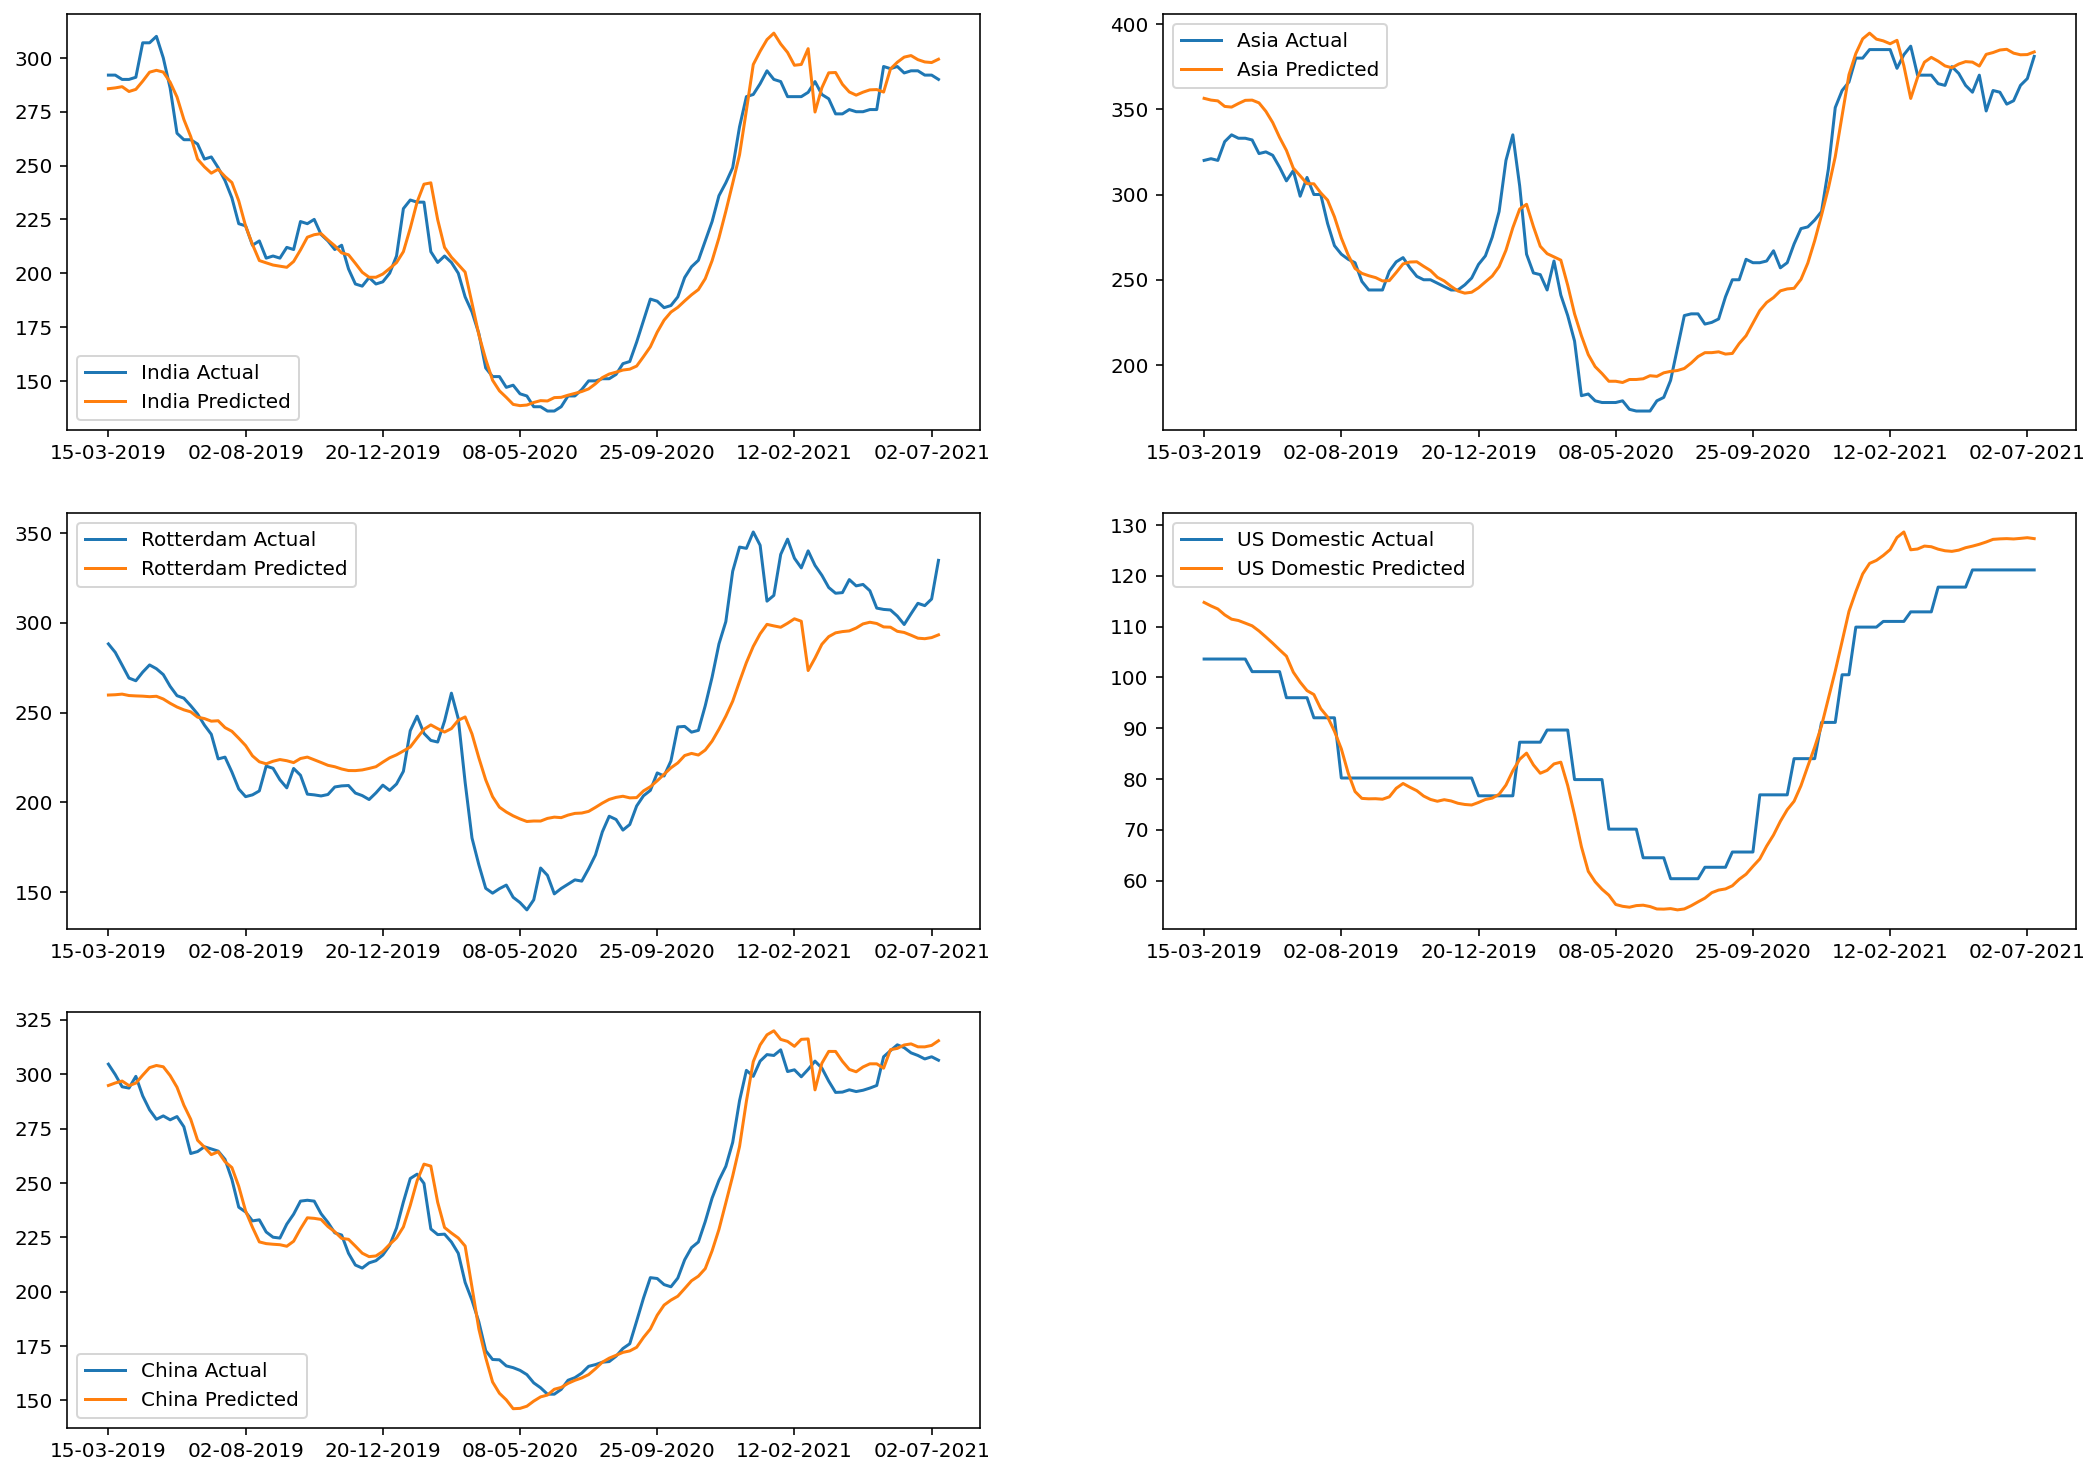

In [53]:

plt.rcParams['figure.figsize'] = (18,13)
plt.subplot(3,2,1)
test_actual['India Actual'].plot(legend=True)
test_result['India Predicted'].plot(legend=True)

plt.subplot(3,2,2)
test_actual['Asia Actual'].plot(legend=True)
test_result['Asia Predicted'].plot(legend=True)

plt.subplot(3,2,3)
test_actual['Rotterdam Actual'].plot(legend=True)
test_result['Rotterdam Predicted'].plot(legend=True)

plt.subplot(3,2,4)
test_actual['US Domestic Actual'].plot(legend=True)
test_result['US Domestic Predicted'].plot(legend=True)

plt.subplot(3,2,5)
test_actual['China Actual'].plot(legend=True)
test_result['China Predicted'].plot(legend=True)

In [54]:
# Checking the mean absolute error
mae = metrics.mean_absolute_error(np.array(test_actual['India Actual']),np.array(test_result['India Predicted']))
mse = metrics.mean_squared_error(np.array(test_actual['India Actual']),np.array(test_result['India Predicted']))
mape = mean_absolute_percentage_error(np.array(test_actual['India Actual']),np.array(test_result['India Predicted']))
print("Mean absolute error of test data set (India):          {}".format(mae))
print("Mean absolute % error of test dataset (India):         {}".format(mape))
print("Mean squared error of error of test dataset (India):   {}".format(mse))
print("*"*50)


mae = metrics.mean_absolute_error(np.array(test_actual['Asia Actual']),np.array(test_result['Asia Predicted']))
mse = metrics.mean_squared_error(np.array(test_actual['Asia Actual']),np.array(test_result['Asia Predicted']))
mape = mean_absolute_percentage_error(np.array(test_actual['Asia Actual']),np.array(test_result['Asia Predicted']))
print("Mean absolute error of train data set (Asia):          {}".format(mae))
print("Mean absolute % error of train dataset (Asia):         {}".format(mape))
print("Mean squared error of error of train dataset (Asia) :  {}".format(mse))
print("*"*50)


mae = metrics.mean_absolute_error(np.array(test_actual['Rotterdam Actual']),np.array(test_result['Rotterdam Predicted']))
mse = metrics.mean_squared_error(np.array(test_actual['Rotterdam Actual']),np.array(test_result['Rotterdam Predicted']))
mape = mean_absolute_percentage_error(np.array(test_actual['Rotterdam Actual']),np.array(test_result['Rotterdam Predicted']))
print("Mean absolute error of test data set (Rotterdam):        {}".format(mae))
print("Mean absolute % error of test dataset (Rotterdam):       {}".format(mape))
print("Mean squared error of error of test dataset (Rotterdam) :{}".format(mse))
print("*"*50)


mae = metrics.mean_absolute_error(np.array(test_actual['US Domestic Actual']),np.array(test_result['US Domestic Predicted']))
mse = metrics.mean_squared_error(np.array(test_actual['US Domestic Actual']),np.array(test_result['US Domestic Predicted']))
mape = mean_absolute_percentage_error(np.array(test_actual['US Domestic Actual']),np.array(test_result['US Domestic Predicted']))
print("Mean absolute error of test data set (US Domestic):         {}".format(mae))
print("Mean absolute % error of test dataset (US Domestic):        {}".format(mape))
print("Mean squared error of error of test dataset (US Domestic) : {}".format(mse))
print("*"*50)


Mean absolute error of test data set (India):          7.942582927766393
Mean absolute % error of test dataset (India):         3.453794118207423
Mean squared error of error of test dataset (India):   101.84692735887957
**************************************************
Mean absolute error of train data set (Asia):          16.654516376432824
Mean absolute % error of train dataset (Asia):         6.189199031137558
Mean squared error of error of train dataset (Asia) :  409.23057392868407
**************************************************
Mean absolute error of test data set (Rotterdam):        23.037248044873845
Mean absolute % error of test dataset (Rotterdam):       10.36569945238833
Mean squared error of error of test dataset (Rotterdam) :834.6227617157799
**************************************************
Mean absolute error of test data set (US Domestic):         7.000035956961209
Mean absolute % error of test dataset (US Domestic):        8.018101225058615
Mean squared error of er

In [55]:
model_json =model.to_json()
with open("methanol_80%train.json","w") as json_file:
    json_file.write(model_json)